In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("/content/employee_raw.xlsx")
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   EmployeeID         153 non-null    int64         
 1   Name               153 non-null    object        
 2   Department         153 non-null    object        
 3   Role               150 non-null    object        
 4   Gender             153 non-null    object        
 5   JoiningDate        153 non-null    datetime64[ns]
 6   Salary             148 non-null    float64       
 7   PerformanceRating  153 non-null    int64         
 8   Attrition          153 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 10.9+ KB


,EmployeeID,Name,Department,Role,Gender,JoiningDate,Salary,PerformanceRating,Attrition
0,1001,Employee_1,IT,Data Analyst,Female,2023-12-12,69381.0,5,No
1,1002,Employee_2,Marketing,Marketing Executive,Male,2016-09-28,50401.0,5,No
2,1003,Employee_3,IT,SysAdmin,Male,2024-09-03,36223.0,3,No


In [4]:
df['JoiningDate'] = pd.to_datetime(df['JoiningDate'])
df['Year'] = df['JoiningDate'].dt.year
df['Month'] = df['JoiningDate'].dt.month_name()

In [5]:
df.isnull().sum()

,0
EmployeeID,0
Name,0
Department,0
Role,3
Gender,0
JoiningDate,0
Salary,5
PerformanceRating,0
Attrition,0
Year,0


In [6]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df['Role'] = df['Role'].fillna("Unknown")

In [7]:
df['Department'].value_counts()

,count
Department,
Finance,37
Marketing,31
Sales,31
HR,28
IT,21
hr,5


In [8]:
df['Gender'].value_counts()

,count
Gender,
Female,92
Male,61


In [9]:
df['Department'] = df['Department'].str.strip().str.title()
df['Name'] = df['Name'].str.strip().str.title()
df['Role'] = df['Role'].str.strip().str.title()

In [10]:
df['Role'].value_counts()

,count
Role,
Financial Analyst,25
Marketing Executive,19
Sales Manager,17
Sales Executive,16
Hr Executive,14
Hr Manager,14
Accountant,12
Seo Specialist,11
Data Analyst,10


In [11]:
df['Department'] = df['Department'].replace('hr', 'HR')
df['Department'] = df['Department'].replace('It', 'IT')
df['Role'] = df['Role'].replace('SysAdmin', 'System Admin')
df['Role'] = df['Role'].fillna("Unknown")

In [12]:
emp_dep = df.groupby('Department')['Salary'].count()
emp_dep

,Salary
Department,
Finance,37
Hr,33
IT,21
Marketing,31
Sales,31


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   EmployeeID         153 non-null    int64         
 1   Name               153 non-null    object        
 2   Department         153 non-null    object        
 3   Role               153 non-null    object        
 4   Gender             153 non-null    object        
 5   JoiningDate        153 non-null    datetime64[ns]
 6   Salary             153 non-null    float64       
 7   PerformanceRating  153 non-null    int64         
 8   Attrition          153 non-null    object        
 9   Year               153 non-null    int32         
 10  Month              153 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(6)
memory usage: 12.7+ KB


In [14]:
avg_salary = df.groupby('Department')['Salary'].mean()
avg_salary

,Salary
Department,
Finance,72627.427319
Hr,62428.649468
IT,73466.142857
Marketing,62608.064516
Sales,68620.155187


In [15]:
df['Gender'].nunique()

2

In [16]:
df['Gender'] = df['Gender'].replace('M', 'Male')
df['Gender'] = df['Gender'].replace('F', 'Female')
df['Gender'] = df['Gender'].str.strip().str.title()

In [17]:
att_gender = df.groupby(['Gender', 'Attrition'])['EmployeeID'].count().unstack()
att_gender

Attrition,No,Yes
Gender,,
Female,74,18
Male,48,13


In [18]:
high_salary = df.sort_values(by='Salary', ascending=False).head(5)
print("\nTop 5 Highest Paid Employees:")
display(high_salary[['EmployeeID', 'Name', 'Department', 'Role', 'Salary']])


Top 5 Highest Paid Employees:


,EmployeeID,Name,Department,Role,Salary
146,1147,Employee_147,Finance,Financial Analyst,119830.0
51,1052,Employee_52,Marketing,Marketing Executive,117827.0
150,1088,Employee_88,Finance,Financial Analyst,117338.0
87,1088,Employee_88,Finance,Financial Analyst,117338.0
127,1128,Employee_128,IT,Sysadmin,116349.0


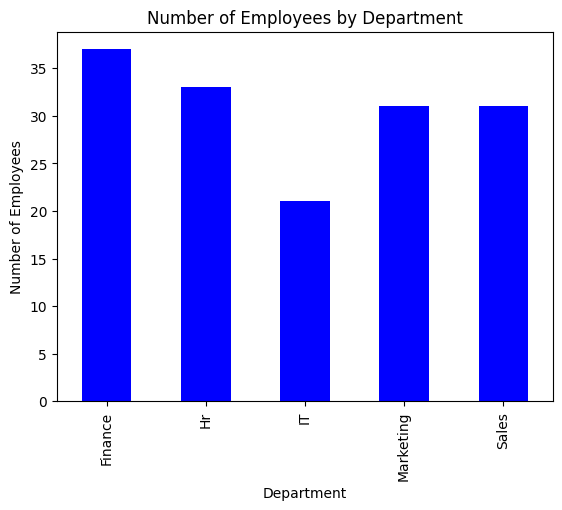

In [19]:
emp_dep.plot(kind='bar', color="blue")
plt.title("Number of Employees by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()

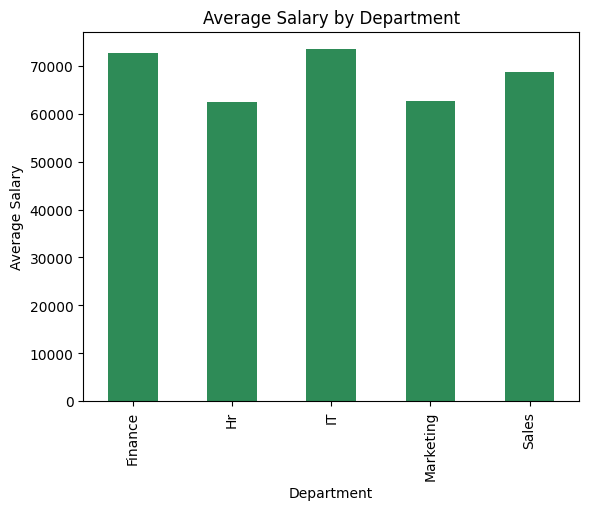

In [20]:
avg_salary.plot(kind='bar', color='seagreen')
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()

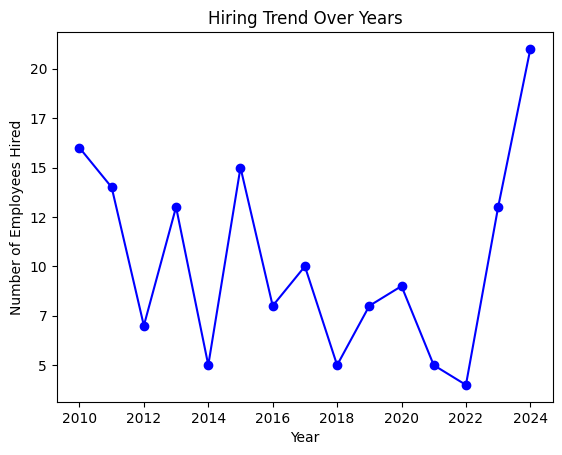

In [21]:
import matplotlib.ticker as mticker
hiring_trend = df.groupby('Year')['EmployeeID'].count()
hiring_trend.plot(kind='line', color='blue', marker="o")
plt.title("Hiring Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Employees Hired")
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
plt.show()

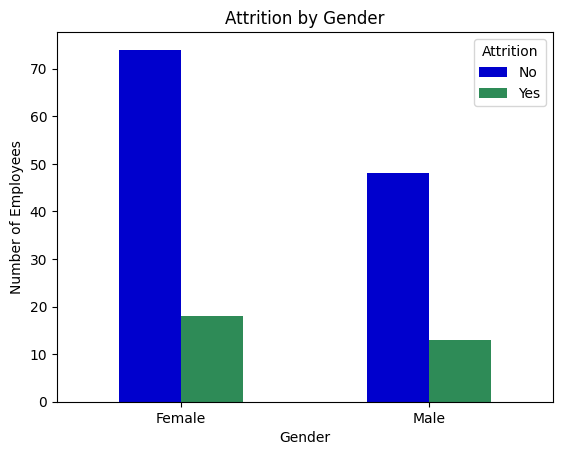

In [22]:
att_gender.plot(kind='bar', color=['mediumblue', 'seagreen'])
plt.title("Attrition by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Employees")
plt.legend(title="Attrition")
plt.xticks(rotation=0)
plt.show()

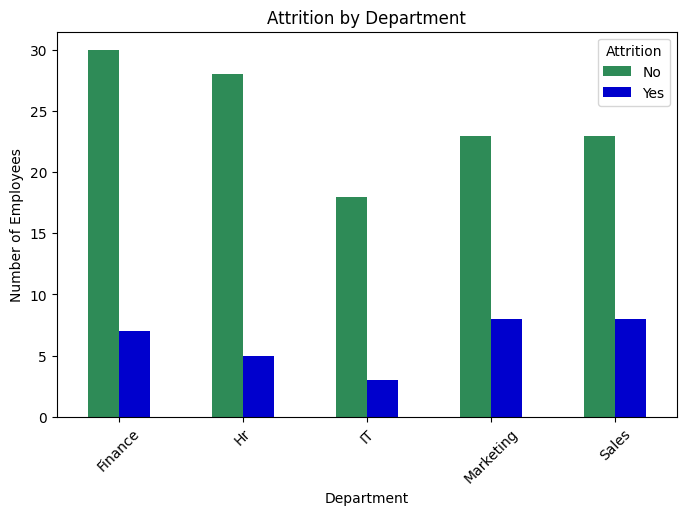

In [23]:
att_dept = df.groupby(['Department', 'Attrition'])['EmployeeID'].count().unstack()

att_dept.plot(kind='bar', stacked=False, figsize=(8,5), color=['seagreen', 'mediumblue'])
plt.title("Attrition by Department")
plt.ylabel("Number of Employees")
plt.xlabel("Department")
plt.legend(title="Attrition")
plt.xticks(rotation=45)
plt.show()

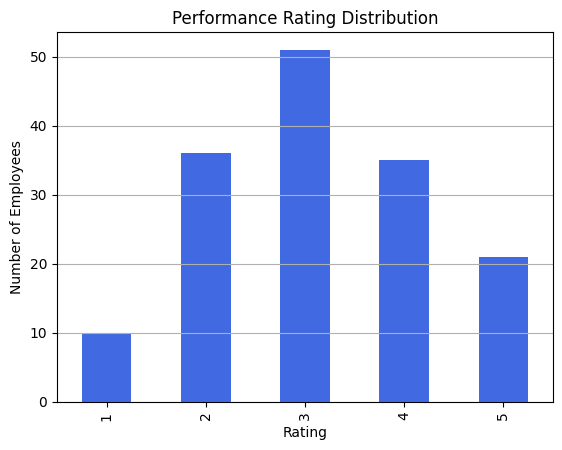

In [26]:
df['PerformanceRating'].value_counts().sort_index().plot(kind='bar', color='royalblue')
plt.title("Performance Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Employees")
plt.grid(axis='y')
plt.show()
